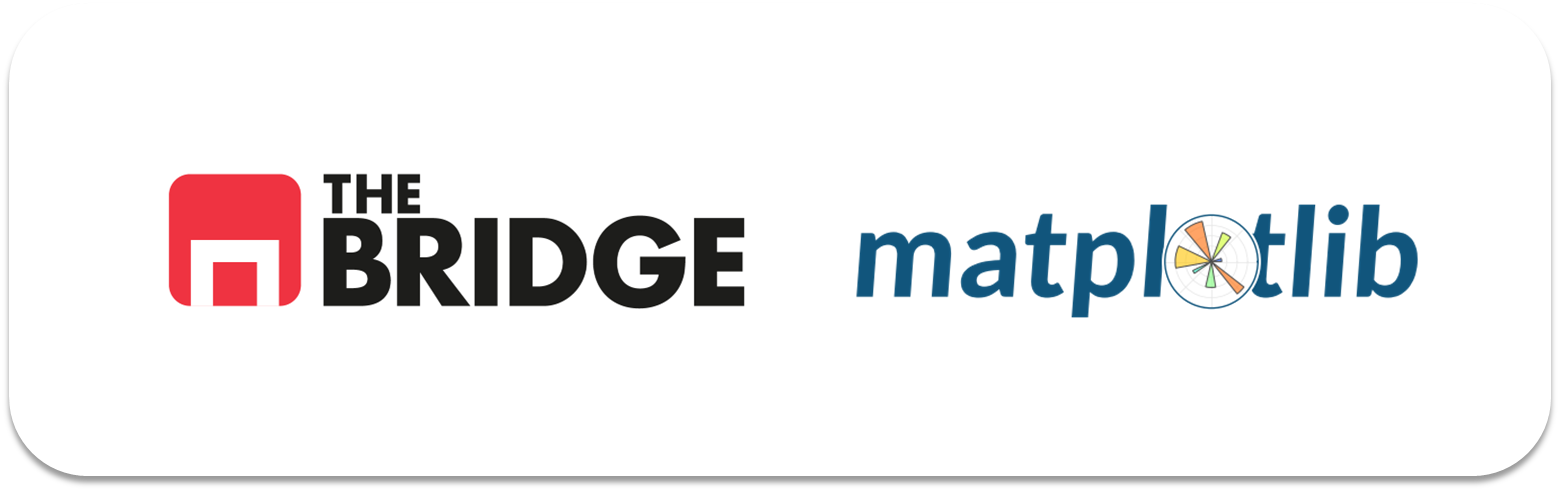

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [3]:
ruta_archivo = './data/california_cities.csv'
try:
    df_ciudades = pd.read_csv(ruta_archivo)
    print("Dataset cargado con éxito.")
except FileNotFoundError:
    print(f"Error")
    df_ciudades = pd.DataFrame()


if not df_ciudades.empty:
    print(df_ciudades.head()) 
    print(df_ciudades.info())


if not df_ciudades.empty:

    filas_antes = len(df_ciudades)
    
    df_ciudades_limpio = df_ciudades.dropna()
    
    filas_despues = len(df_ciudades_limpio)
    
    print(f"Filas originales: {filas_antes}")
    print(f"Filas después de eliminar nulos: {filas_despues}")
    print(f"Filas eliminadas: {filas_antes - filas_despues}")

    df_ciudades = df_ciudades_limpio

    print("\nVerificación de Nulos restantes")
    print(df_ciudades.isnull().sum()) 

Dataset cargado con éxito.
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  a

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

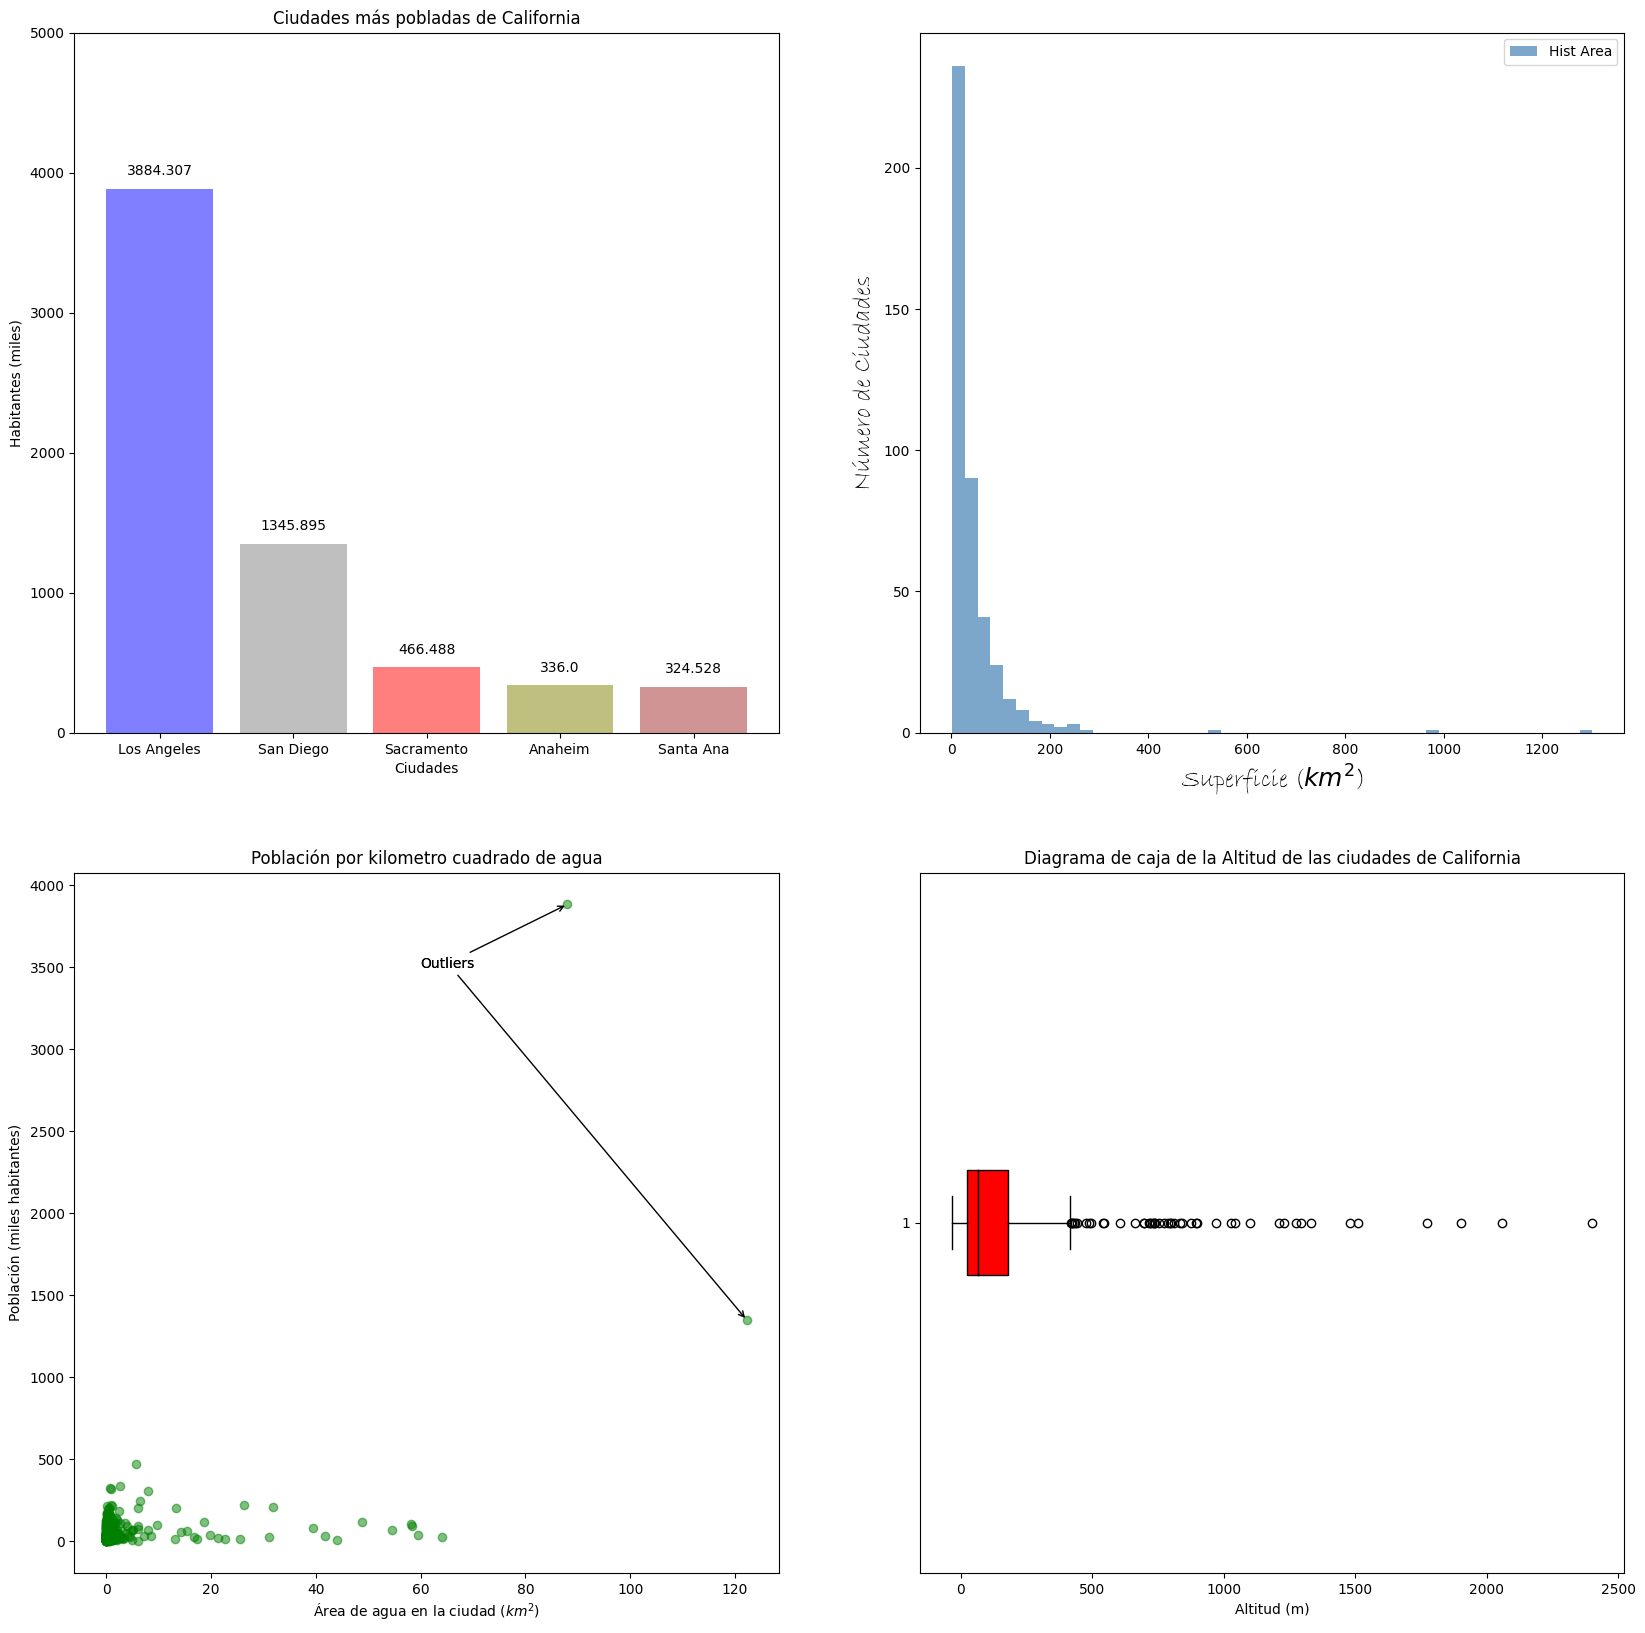

In [4]:
# Importaciones necesarias (si no se hicieron antes)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza (si no se ejecutó antes en la misma sesión)
ruta_archivo = './data/california_cities.csv'
try:
    df_ciudades = pd.read_csv(ruta_archivo).dropna()
except FileNotFoundError:
    print("Error: Asegúrate de tener el archivo 'california_cities.csv' en './data/'.")
    # Crear un DataFrame de ejemplo si el archivo no existe para mostrar la estructura del código.
    data = {
        'city': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno'],
        'population_total': [3990456, 1423851, 1035317, 881549, 520053],
        'area_total_sq_mi': [503, 372.4, 179.9, 46.9, 112.3],
        'water_area_sq_mi': [30.4, 28.5, 3.4, 21.3, 0.4],
        'elevation_ft': [305, 62, 85, 52, 308]
    }
    df_ciudades = pd.DataFrame(data)

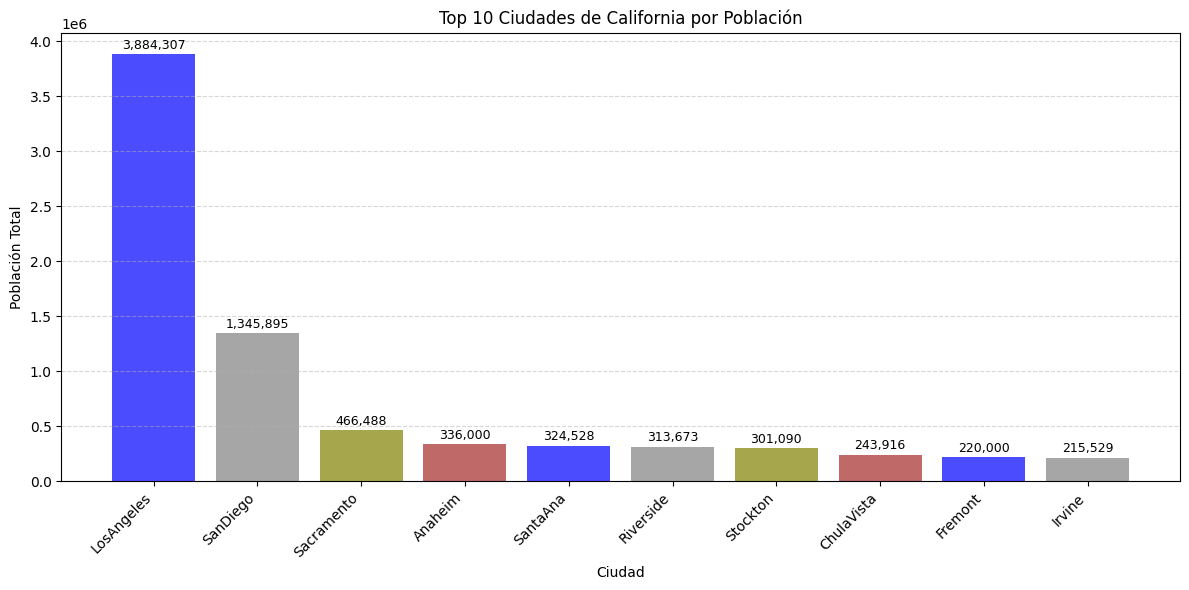

In [5]:
# 1. Preparar los datos (Top 10 ciudades por población)
df_top_poblacion = df_ciudades.sort_values(by='population_total', ascending=False).head(10)

# Definir colores y transparencia
colores = ['blue', 'gray', 'olive', 'brown'] * 3 # Se repiten para las 10 barras
alpha_val = 0.7 

plt.figure(figsize=(12, 6))
plt.bar(
    df_top_poblacion['city'], 
    df_top_poblacion['population_total'], 
    color=colores[:len(df_top_poblacion)], 
    alpha=alpha_val
)

# Añadir etiquetas de población (el argumento 'ha' o 'horizontalalignment' se usa para centrar)
for i, (city, pop) in enumerate(zip(df_top_poblacion['city'], df_top_poblacion['population_total'])):
    # Usamos ha='center' para centrar el texto sobre la barra
    plt.text(i, pop + 50000, f'{pop:,.0f}', ha='center', fontsize=9)

plt.title('Top 10 Ciudades de California por Población')
plt.xlabel('Ciudad')
plt.ylabel('Población Total')
plt.xticks(rotation=45, ha='right') # Rotar para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

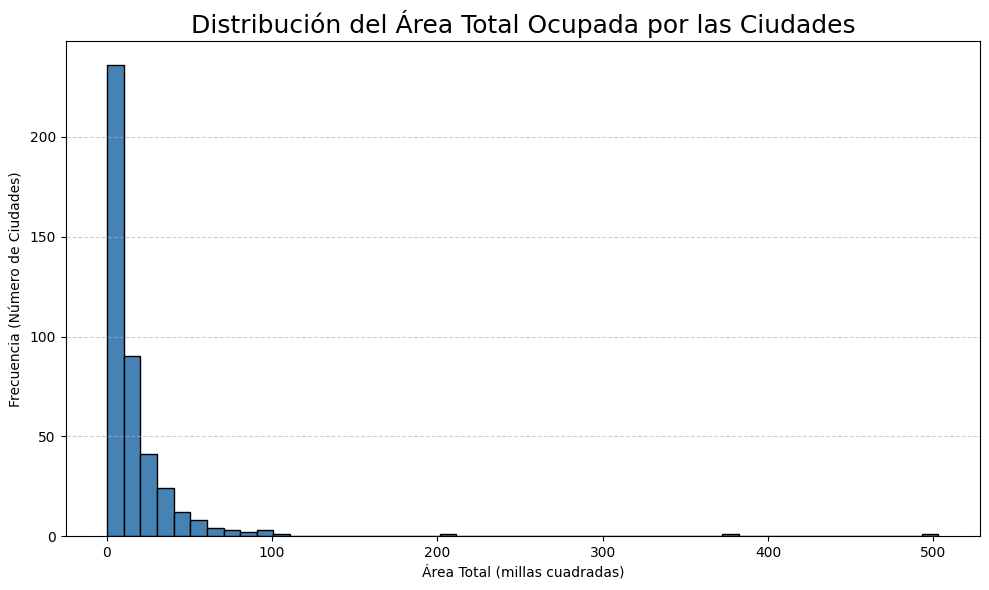

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(
    df_ciudades['area_total_sq_mi'], 
    bins=50, 
    color='steelblue', 
    edgecolor='black' 
)

titulo_fuente = { 'fontsize': 18}

plt.title('Distribución del Área Total Ocupada por las Ciudades', **titulo_fuente)
plt.xlabel('Área Total (millas cuadradas)')
plt.ylabel('Frecuencia (Número de Ciudades)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

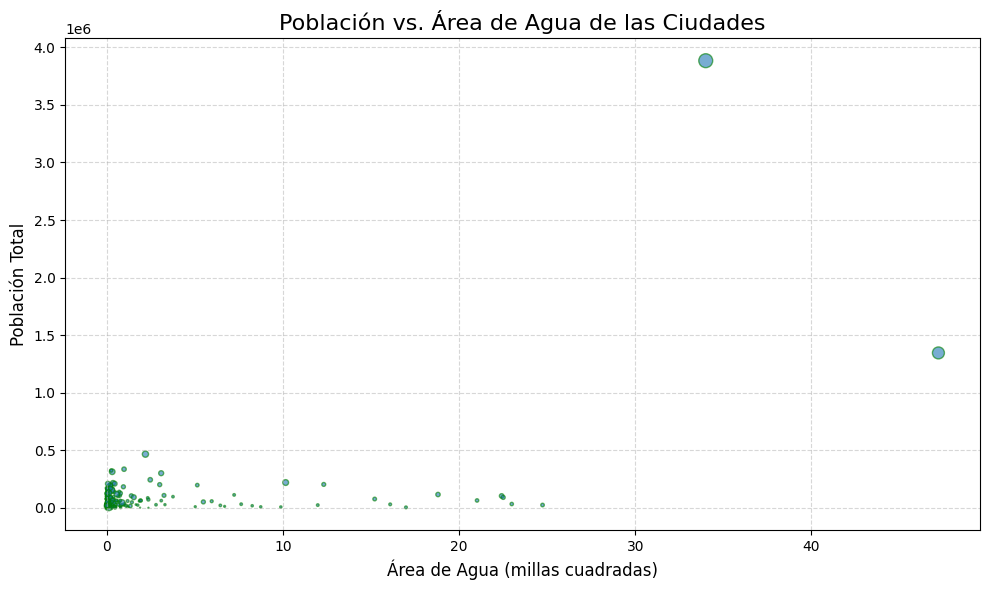

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(

    df_ciudades['area_water_sq_mi'],  

    df_ciudades['population_total'], 
    alpha=0.6,          
    edgecolors='g',     
    s=df_ciudades['area_total_sq_mi'] / 5 
)

plt.title('Población vs. Área de Agua de las Ciudades', fontsize=16)
plt.xlabel('Área de Agua (millas cuadradas)', fontsize=12)
plt.ylabel('Población Total', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

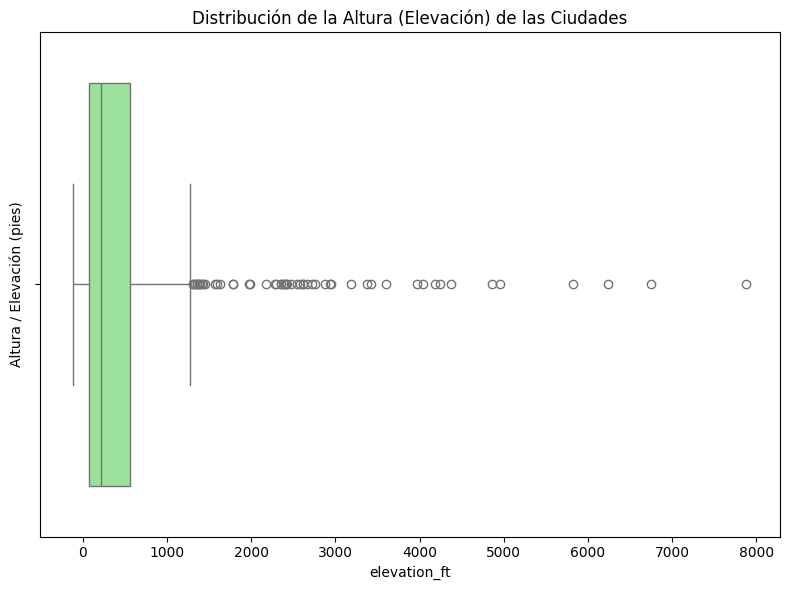

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_ciudades['elevation_ft'], color='lightgreen') # Usamos seaborn para boxplots, que son más estéticos por defecto

plt.title('Distribución de la Altura (Elevación) de las Ciudades')
plt.ylabel('Altura / Elevación (pies)')
plt.tight_layout()
plt.show()

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [ ]:
fig.savefig('visualizacion_practica.png', bbox_inches='tight', dpi=300) 
print("Figura guardada exitosamente como 'visualizacion_practica.png'") 

Figura guardada exitosamente como 'visualizacion_practica.png'
